
# Real Estate Datasets — Quickstart Exploration

This notebook helps you **load and explore** four datasets with Pandas.

> **Before you run:** Put this notebook **in the same folder** as your CSV files:
- `housing.csv`
- `world_real_estate_data(147k).csv`
- `Real Estate Data V21.csv`
- `real_estate_dataset.csv`

If your file names/paths are different, edit the `files` dictionary in the next cell.


In [1]:

# (Optional) Install libraries — run this only if you get ModuleNotFoundError
# !pip install --upgrade pip
# !pip install pandas matplotlib numpy


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 120)
pd.set_option("display.max_columns", None)


Matplotlib is building the font cache; this may take a moment.


In [3]:

# Update these paths if your files are elsewhere
files = {
    "California Housing Prices": "housing.csv",
    "World Real Estate Data": "world_real_estate_data(147k).csv",
    "Indian Cities Real Estate": "Real Estate Data V21.csv",
    "Indian House Price Prediction": "real_estate_dataset.csv",
}
files


{'California Housing Prices': 'housing.csv',
 'World Real Estate Data': 'world_real_estate_data(147k).csv',
 'Indian Cities Real Estate': 'Real Estate Data V21.csv',
 'Indian House Price Prediction': 'real_estate_dataset.csv'}

In [15]:

def overview(df: pd.DataFrame, name: str, head_n: int = 5):
    print(f"\n=== {name} ===")
    print("Shape:", df.shape)
    print("\nColumns:", list(df.columns))
    mv = df.isna().sum()
    mv_pct = (mv / len(df) * 100).round(2)
    miss = pd.DataFrame({"missing": mv, "missing_%": mv_pct}).sort_values("missing_%", ascending=False)
    print("\nMissing values (top 10):")
    display(miss.head(10))
    print("\nHead:")
    display(df.head(head_n))


In [5]:

dfs = {}
errors = {}

for name, path in files.items():
    try:
        df = pd.read_csv(path)
        dfs[name] = df
    except Exception as e:
        errors[name] = str(e)

if errors:
    print("Some files could not be loaded:")
    for k, v in errors.items():
        print(f"- {k}: {v}")
else:
    print("All files loaded successfully!")


Some files could not be loaded:
- World Real Estate Data: [Errno 2] No such file or directory: 'world_real_estate_data(147k).csv'
- Indian Cities Real Estate: [Errno 2] No such file or directory: 'Real Estate Data V21.csv'


In [6]:

for name, df in dfs.items():
    overview(df, name)



=== California Housing Prices ===
Shape: (20640, 10)

Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

Missing values (top 10):


,missing,missing_%
total_bedrooms,207,1.0
longitude,0,0.0
latitude,0,0.0
housing_median_age,0,0.0
total_rooms,0,0.0
population,0,0.0
households,0,0.0
median_income,0,0.0
median_house_value,0,0.0
ocean_proximity,0,0.0



Head:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



=== Indian House Price Prediction ===
Shape: (287, 9)

Columns: ['url', 'beds', 'city', 'date', 'size', 'type', 'baths', 'price', 'neighborhood']

Missing values (top 10):


,missing,missing_%
url,0,0.0
beds,0,0.0
city,0,0.0
date,0,0.0
size,0,0.0
type,0,0.0
baths,0,0.0
price,0,0.0
neighborhood,0,0.0



Head:


,url,beds,city,date,size,type,baths,price,neighborhood
0,https://www.99acres.com/residential-land-plot-for-sale-in-vaishnavi-urban-county-jigani-bangalore-south-89-sq-yard-t...,0,Bangalore,2025-02-19,799-1258 sqft,Residential land / Plot,0,2317000.0,Jigani
1,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-prestige-jindal-city-tumkur-road-bangalore-west-108...,2,Bangalore,2025-02-19,1085 sqft,2 BHK Flat,2,12500000.0,Tumkur Road
2,https://www.99acres.com/sumadhura-capitol-residences-whitefield-bangalore-east-npxid-r433778,3,Bangalore,2025-02-19,1525-2150 sqft,"3, 4 BHK Apartment",0,23200000.0,Whitefield
3,https://www.99acres.com/provident-botanico-soukya-road-bangalore-east-npxid-r424433,2,Bangalore,2025-02-19,658-1003 sqft,"2, 3 BHK Apartment",0,889000.0,Soukya Road
4,https://www.99acres.com/kvg-superior-kalkere-bangalore-south-npxid-r438820,2,Bangalore,2025-02-19,1179-1449 sqft,"2, 3 BHK Apartment",0,6483000.0,Kalkere


In [7]:

for name, df in dfs.items():
    print(f"\n--- Numeric Summary: {name} ---")
    num = df.select_dtypes(include="number")
    if num.shape[1] == 0:
        print("No numeric columns found.")
    else:
        display(num.describe().T)



--- Numeric Summary: California Housing Prices ---


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000



--- Numeric Summary: Indian House Price Prediction ---


,count,mean,std,min,25%,50%,75%,max
beds,287.0,2.156794e+00,1.767959e+00,0.0,0.0,2.0,3.0,12.0
baths,287.0,1.526132e+00,1.771525e+00,0.0,0.0,1.0,2.0,12.0
price,287.0,1.956434e+07,4.461799e+07,0.0,4738000.0,10000000.0,20850000.0,600000000.0



--- Histograms: California Housing Prices ---


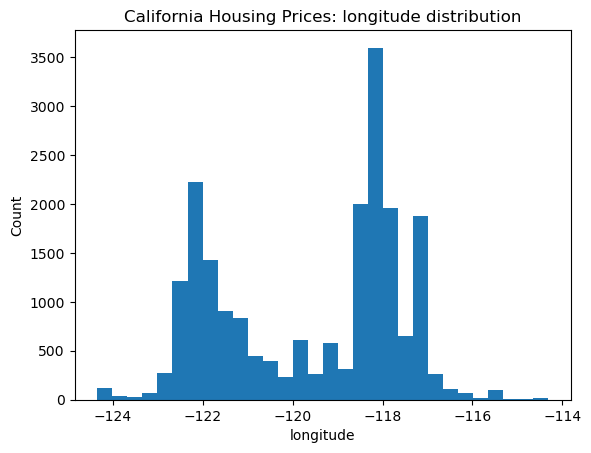

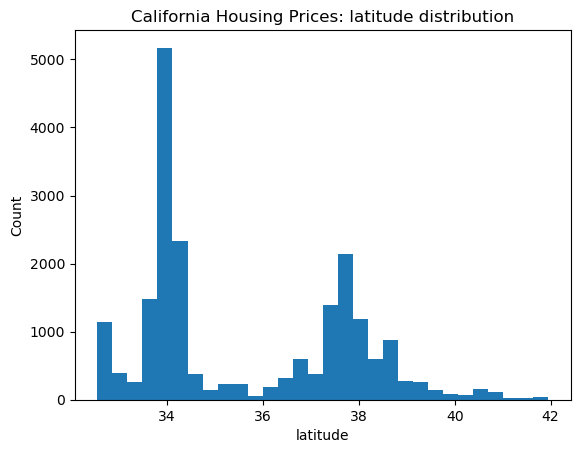

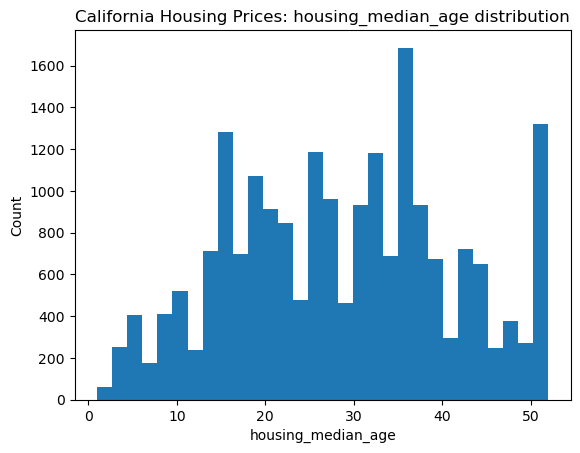

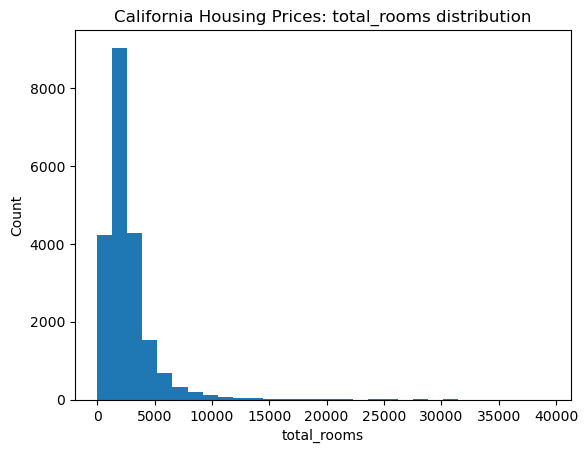

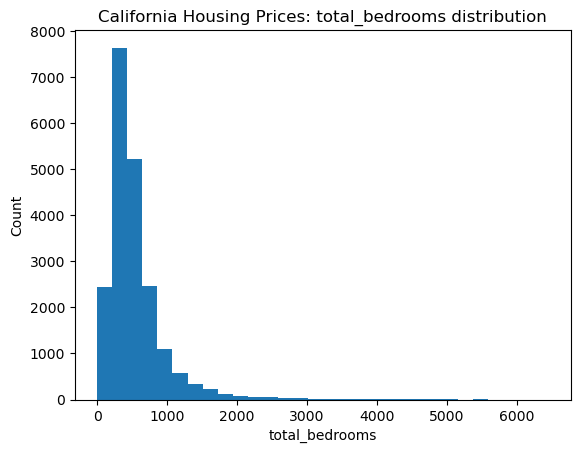

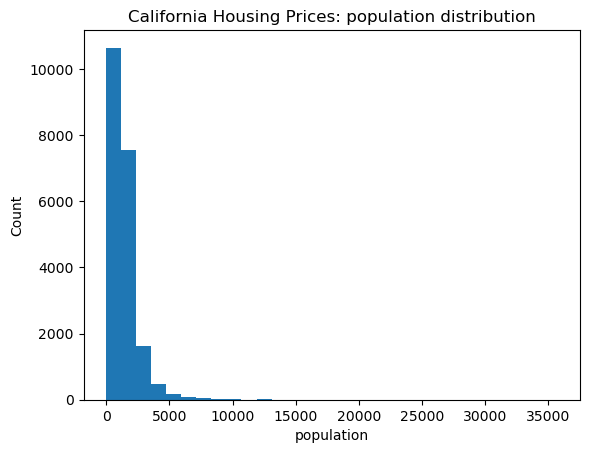


--- Histograms: Indian House Price Prediction ---


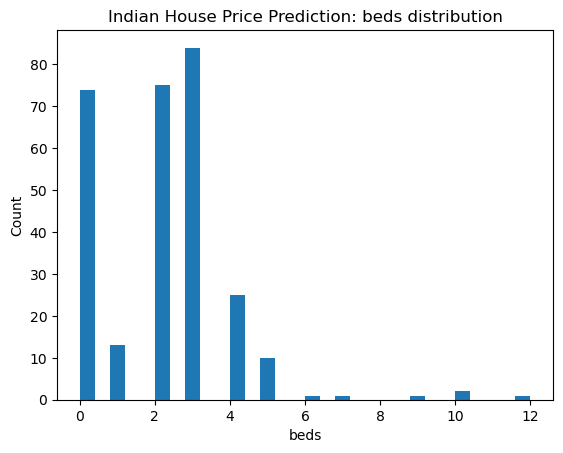

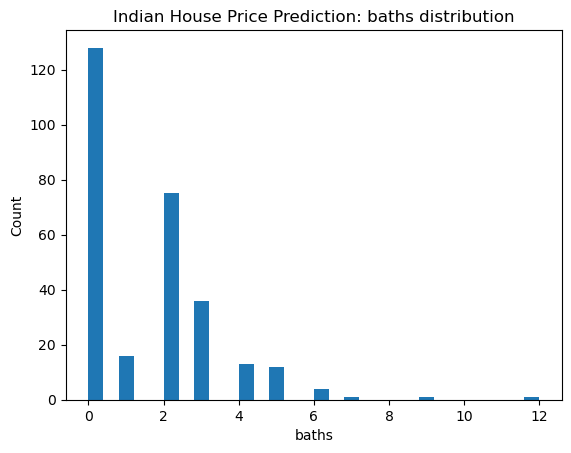

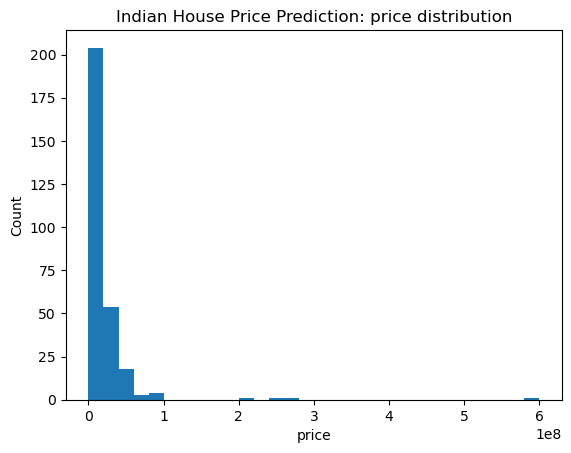

In [8]:

for name, df in dfs.items():
    print(f"\n--- Histograms: {name} ---")
    num_cols = df.select_dtypes(include="number").columns[:6]  # up to 6 columns
    for col in num_cols:
        plt.figure()
        df[col].plot.hist(bins=30)
        plt.title(f"{name}: {col} distribution")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


In [9]:

for name, df in dfs.items():
    num = df.select_dtypes(include="number")
    if num.shape[1] >= 2:
        corr = num.corr(numeric_only=True)
        print(f"\n--- Correlation (top pairs): {name} ---")
        corr_pairs = (
            corr.where(~np.tril(np.ones(corr.shape), k=0).astype(bool))  # lower triangle only
            .stack()
            .rename("corr")
            .sort_values(key=lambda s: s.abs(), ascending=False)
        )
        display(corr_pairs.head(10))
    else:
        print(f"\n{name}: Not enough numeric columns for correlation.")



--- Correlation (top pairs): California Housing Prices ---


total_bedrooms      households            0.979728
total_rooms         total_bedrooms        0.930380
longitude           latitude             -0.924664
total_rooms         households            0.918484
population          households            0.907222
total_bedrooms      population            0.877747
total_rooms         population            0.857126
median_income       median_house_value    0.688075
housing_median_age  total_rooms          -0.361262
                    total_bedrooms       -0.320451
Name: corr, dtype: float64


--- Correlation (top pairs): Indian House Price Prediction ---


beds   baths    0.747224
baths  price    0.034577
beds   price    0.020138
Name: corr, dtype: float64

In [10]:

for name, df in dfs.items():
    print(f"\n--- Categorical Peek: {name} ---")
    cat = df.select_dtypes(include=["object"])
    for col in cat.columns[:5]:  # up to 5 categorical columns
        print(f"\nColumn: {col}")
        display(cat[col].value_counts().head(10))



--- Categorical Peek: California Housing Prices ---

Column: ocean_proximity


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


--- Categorical Peek: Indian House Price Prediction ---

Column: url


url
https://www.99acres.com/5-bhk-bedroom-independent-house-villa-for-sale-in-ramanayapeta-kakinada-3150-sq-ft-spid-X80181911        3
https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-sasikanth-nagar-kakinada-2400-sq-ft-spid-O80266555     2
https://www.99acres.com/5-bhk-bedroom-independent-house-villa-for-sale-in-sasikanth-nagar-kakinada-28800-sq-ft-spid-O80294923    2
https://www.99acres.com/3-bhk-bedroom-independent-house-villa-for-sale-in-atchampeta-kakinada-2600-sq-ft-spid-F79579347          2
https://www.99acres.com/3-bhk-bedroom-independent-house-villa-for-sale-in-kovvada-kakinada-1800-sq-ft-spid-W79454185             2
https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-vakalapudi-kakinada-165-sq-ft-spid-J78732827           2
https://www.99acres.com/sumadhura-capitol-residences-whitefield-bangalore-east-npxid-r433778                                     1
https://www.99acres.com/provident-botanico-soukya-road-bangalore-east-npxid-r42


Column: city


city
Kakinada         37
Visakhapatnam    25
Noida            22
Hyderabad        20
Chennai          20
Mumbai           17
Bhubaneswar      10
Bangalore        10
Gurgaon          10
Kochi            10
Name: count, dtype: int64


Column: date


date
2025-02-19                  155
2025-01-19                   29
3mo ago                      15
2025-02-19T04:38:34.048Z     10
2025-02-19T04:38:35.432Z     10
2025-02-19T04:38:38.010Z     10
2025-02-19T04:38:36.102Z      9
2025-02-19T04:38:38.179Z      8
2mo ago                       7
1mo ago                       6
Name: count, dtype: int64


Column: size


size
Varies           24
sq.ft            10
various           8
Not specified     8
1800 sqft         5
1350 sqft         4
3150 sqft         4
1503 sqft         3
1000 sqft         3
2304 sqft         2
Name: count, dtype: int64


Column: type


type
Residential land / Plot    47
2, 3 BHK Apartment         21
Apartment                  21
3, 4 BHK Apartment         19
3 BHK Flat                 17
Land                       16
Villa                      11
Flat                       11
3 BHK Apartment            10
2 BHK Flat                 10
Name: count, dtype: int64

In [11]:

report_rows = []
for name, df in dfs.items():
    mv = df.isna().sum()
    mv_pct = (mv / len(df) * 100).round(2)
    report_rows.append({
        "dataset": name,
        "rows": len(df),
        "cols": df.shape[1],
        "missing_cells": int(mv.sum()),
        "missing_%": round((mv.sum() / (len(df) * df.shape[1])) * 100, 2) if len(df) else 0
    })
report = pd.DataFrame(report_rows)
report_path = "exploration_report.csv"
report.to_csv(report_path, index=False)
report, report_path


(                         dataset   rows  cols  missing_cells  missing_%
 0      California Housing Prices  20640    10            207        0.1
 1  Indian House Price Prediction    287     9              0        0.0,
 'exploration_report.csv')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           287 non-null    object 
 1   beds          287 non-null    int64  
 2   city          287 non-null    object 
 3   date          287 non-null    object 
 4   size          287 non-null    object 
 5   type          287 non-null    object 
 6   baths         287 non-null    int64  
 7   price         287 non-null    float64
 8   neighborhood  287 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 20.3+ KB


In [14]:
df.head(10)


,url,beds,city,date,size,type,baths,price,neighborhood
0,https://www.99acres.com/residential-land-plot-for-sale-in-vaishnavi-urban-county-jigani-bangalore-south-89-sq-yard-t...,0,Bangalore,2025-02-19,799-1258 sqft,Residential land / Plot,0,2317000.0,Jigani
1,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-prestige-jindal-city-tumkur-road-bangalore-west-108...,2,Bangalore,2025-02-19,1085 sqft,2 BHK Flat,2,12500000.0,Tumkur Road
2,https://www.99acres.com/sumadhura-capitol-residences-whitefield-bangalore-east-npxid-r433778,3,Bangalore,2025-02-19,1525-2150 sqft,"3, 4 BHK Apartment",0,23200000.0,Whitefield
3,https://www.99acres.com/provident-botanico-soukya-road-bangalore-east-npxid-r424433,2,Bangalore,2025-02-19,658-1003 sqft,"2, 3 BHK Apartment",0,889000.0,Soukya Road
4,https://www.99acres.com/kvg-superior-kalkere-bangalore-south-npxid-r438820,2,Bangalore,2025-02-19,1179-1449 sqft,"2, 3 BHK Apartment",0,6483000.0,Kalkere
5,https://www.99acres.com/nambiar-district-25-sarjapur-road-bangalore-east-npxid-r432506,2,Bangalore,2025-02-19,1199-2484 sqft,"2, 3, 4 BHK Apartment",0,15000000.0,Sarjapur Road
6,https://www.99acres.com/mahaveer-celesse-yelahanka-bangalore-north-npxid-r263821,2,Bangalore,2025-02-19,794-1923 sqft,"2, 3 BHK Apartment",0,7518000.0,Yelahanka
7,https://www.99acres.com/keya-life-by-the-lake-hebbal-bangalore-north-npxid-r178479,4,Bangalore,2025-02-19,0 sqft,"4, 5 BHK Villa",0,39800000.0,Hebbal
8,https://www.99acres.com/amrutha-platinum-towers-whitefield-bangalore-east-npxid-r305417,2,Bangalore,2025-02-19,1006-1636 sqft,"2, 3 BHK Apartment",0,11100000.0,Whitefield
9,https://www.99acres.com/keya-spring-bannerghatta-road-bangalore-south-npxid-r401648,2,Bangalore,2025-02-19,1335-2700 sqft,"2, 3, 4 BHK Apartment",0,15700000.0,Bannerghatta Road
